# <span style="color:darkblue"> Lecture 17: Classification Metrics </span>

<font size = "5">

In this lecture we will learn more about Support <br>
Vector Machines (SVM). We will start the class with a short video:

 https://www.youtube.com/watch?v=_YPScrckx28

 https://www.youtube.com/watch?v=Q7vT0--5VII

 <font size = "5">

 In this lecture we will emphasize:
 - A new method SVM
 - Importance of scaling data
 - How to obtain performance metrics
 - How to tune parameters

# <span style="color:darkblue"> I. Setup Working Environment </span>


<font size = "5">

We will be using the API of the University of California <br>
Irving Machine Learning Repository

In Windows (Anaconda Prompt) or Mac (Terminal) type:

``` pip install ucimlrepo ```

https://archive.ics.uci.edu

In [1]:
# Import the package for the University of California Irvine API
from ucimlrepo import fetch_ucirepo 

# Import SK-Learn library for machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# <span style="color:darkblue"> II. Data </span>

<font size = "5">

Online Shoppers Purchasing Intention Dataset (OSHPID)

- This dataset contains information about user sessions
- It contains features data about user behavior 
while <br> navigating website
- The goal is to predict whether the customer will purchase or not

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


In [2]:
# Fetch online data from the UC Irvine Machine Learning Repository API
online_shopping= fetch_ucirepo(id=468) 

# Extract
X = online_shopping.data.features
# Drop columns that contain non-numeric values
X = X.drop(columns = ["Month","VisitorType"])

# Extract label data
y = online_shopping.data.targets["Revenue"]


<font size = "5">

Total size of dataset

In [3]:
# Compute total numbers or rows
print(len(y))
print(len(X))

12330
12330


<font size = "5">

Extract column names

- Check separately in VS-Code Data Viewer

In [4]:
dataset_names = pd.DataFrame(X.columns)

<font size = "5">

Obtain table of proportions for outcome

- 0 if the customer did not purchase product
- 1 if the customer purchase the product

In [5]:
# Compute frequency table for label
table_y = pd.crosstab(y,"Purchased ?") / len(y)
display(table_y)

col_0,Purchased ?
Revenue,
False,0.845255
True,0.154745


<font size = "5">

Obtain Basic Descriptive Statistics of features

In [6]:
# Compute table of descriptive statistics for features
display(X.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<font size = "5">

Split into training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

<font size = "5">

For many ML problems it is useful to scale the data

<font size = "3">

- Preprocessing ensures that the data has mean zero and unit variance
- A lot of things related to sc-learn use a function structure
    -  You start by defining a "scaler" function which computes <br>
    the mean and variance.
    - Then the "scaler" function is applied to the corresponding dataset
    - It is important to compute a separate scalar for the training <br>
    and test data to avoid "contaminating" the data

In [8]:
# The first step is to produce a "scaler" function
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test  = preprocessing.StandardScaler().fit(X_test)

# Apply scaler function
X_train_scale = scaler_train.transform(X_train)
X_test_scale  = scaler_test.fit(X_test).transform(X_test)

# <span style="color:darkblue"> III. Support Vector Machinees (SVMs) </span>

<font size = "5">

One of the most popular methods of classifcation are SVMs


<font size = "5">

https://scikit-learn.org/stable/modules/svm.html#svm-classification
https://en.wikipedia.org/wiki/Support_vector_machine


<font size = "3">

- The default regularization parameter is $C = 1$
- The default kernel curvature parameter is  $gamma = 1/(\# features)$


In [52]:
svm = SVC()
svm.fit(X_train_scale, y_train)

SVC()

In [11]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
7645,4,23.533333,0,0.0,10,118.000000,0.011111,0.066667,0.000000,0.0,2,2,2,3,True
141,0,0.000000,0,0.0,9,272.500000,0.000000,0.011852,0.000000,0.2,1,1,6,3,False
6801,1,0.000000,0,0.0,1,74.600000,0.100000,0.100000,0.000000,0.0,3,2,1,4,False
367,1,11.888889,0,0.0,111,3510.879903,0.000098,0.009438,12.016565,0.0,3,2,5,2,False
5815,16,391.683333,0,0.0,24,443.750000,0.000000,0.006452,0.000000,0.0,2,10,7,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,9,103.933333,0,0.0,16,172.133333,0.012000,0.049000,0.000000,0.0,1,1,1,2,False
8846,0,0.000000,3,1830.5,81,5000.739116,0.003294,0.020433,0.000000,0.0,2,2,3,2,True
729,0,0.000000,0,0.0,15,1148.000000,0.014286,0.050000,0.000000,0.0,3,2,1,3,False
5825,2,15.200000,0,0.0,22,244.200000,0.027273,0.063636,0.000000,0.0,2,2,7,1,True


<font size = "5">

Out-of-sample predictions

In [20]:
predictions = svm.predict(X_test_scale)


<font size = "5">

Confusion Matrix with SK-Learn


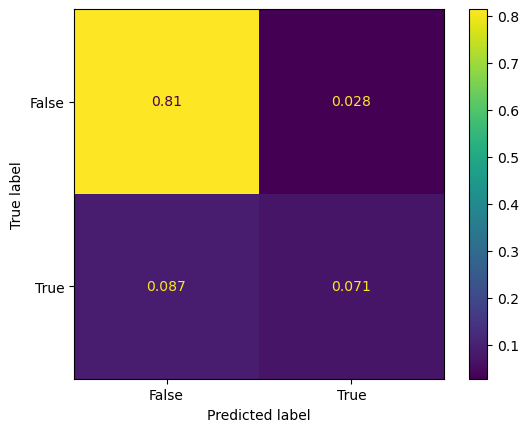

In [21]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

<font size = "5">

Try it yourself!

<font size = "3">

- What if you do not scale the features?
- Compute the confusion matrix for the SVM model without rescaling

Note:
- Often variables have very different scales
- Machine learning models such as SVM use notions of proximity 
- With heterogeneous variances, certain features will end up getting more
weight 
- Standardization helps puts the variables on equal footing

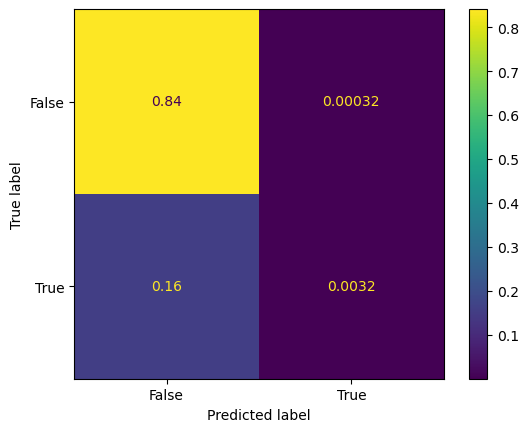

In [53]:

# Do not scale the features
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()








# <span style="color:darkblue"> III. Performance and Decision Thresholds </span>

<font size = "5">

There are many possible performance metrics

(see textbook for more details)

In [36]:

!pip install --upgrade scikit-learn

In [43]:

from sklearn.metrics import get_scorer_names
import pandas as pd

list_scorers = pd.DataFrame(sorted(get_scorer_names()))
list_scorers


,0
0,accuracy
1,adjusted_mutual_info_score
2,adjusted_rand_score
3,average_precision
4,balanced_accuracy
5,completeness_score
6,explained_variance
7,f1
8,f1_macro
9,f1_micro


<font size = "5">

Obtain some of these metrics via cross-validation

- This usually takes a while to compute

In [45]:
# Scoring sets the variables that you want to compute

res = cross_validate(SVC(), X_train_scale, y_train,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))


,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.280559,0.211093,0.886486,0.909017,0.846869,0.896736,0.719641,0.761955
1,0.278560,0.215440,0.892432,0.906719,0.862575,0.900466,0.721712,0.755548
2,0.267476,0.215846,0.903191,0.904028,0.854618,0.892485,0.732961,0.749831
3,0.283468,0.213761,0.898864,0.903487,0.873559,0.891715,0.725535,0.746781
4,0.272442,0.213556,0.894538,0.906732,0.826146,0.906040,0.727303,0.756271


<font size = "5">

Summarize results across folds

In [47]:
pd.DataFrame(res).mean()

fit_time              0.276501
score_time            0.213939
test_accuracy         0.895102
train_accuracy        0.905997
test_roc_auc          0.852754
train_roc_auc         0.897489
test_recall_macro     0.725430
train_recall_macro    0.754077
dtype: float64

<font size ="5">

Try it yourself!

Try obtaining other performance metrics
 

In [51]:
# Write your own code
# Obtain other performance metrics
res = cross_validate(SVC(), X_train_scale, y_train,
                     scoring=["precision", "neg_log_loss", "recall_macro"],
                     return_train_score=True, cv=5)

# # Display the results
# display(pd.DataFrame(res))

# Compute the standard deviation of the results
pd.DataFrame(res).mean()

/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    if isinstance(scorer, _BaseScorer):
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 399, in _score
    raise ValueError(
         ^^^^^^^^^^^^^
  File "/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
  File "/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 73, in _get_response_values
    """Get the response values when the response method is `decision_function`.
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

fit_time              0.271062
score_time            0.108516
test_precision        0.747448
train_precision       0.783826
test_neg_log_loss          NaN
train_neg_log_loss         NaN
test_recall_macro     0.725430
train_recall_macro    0.754077
dtype: float64

# <span style="color:darkblue"> IV. Tuning by Cross Validation </span>


<font size = "5">

Manually create a grid of values for tuning

<font size = "3">

- Initially we will run this with a single training-test pair
- For computational ease we just try two parameters <br>
on the grid, but in a real application we may want more

In [42]:
k_features = X.shape[1]
k_features

15

In [111]:
k_features = X.shape[1]

best_score = 0

for gamma in [0.1/(k_features), 1/(k_features)]:   
    for C in [0.1, 1]:
        # Add a message to know the progress of the algorithm
        print("Evaluating - gamma: "+str(gamma)+"  - C: "+str(C))
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_scale, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(best_parameters)

Evaluating - gamma: 0.006666666666666667  - C: 0.1


Evaluating - gamma: 0.006666666666666667  - C: 1
Evaluating - gamma: 0.06666666666666667  - C: 0.1
Evaluating - gamma: 0.06666666666666667  - C: 1
{'C': 1, 'gamma': 0.06666666666666667}


<font size = "5">

Estimate optimal model on all data

In [ ]:

# rebuild a model on the combined training and validation set
# **best_parameters enters the dictionary format

svm = SVC(**best_parameters)
svm.fit(X_train_scale, y_train)

<font size ="5">

Obtain confusion matrix

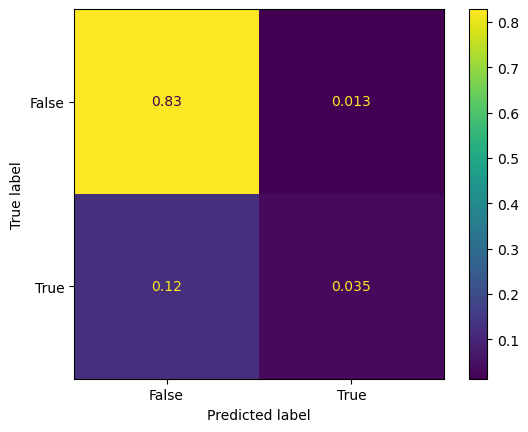

In [96]:
# Obtain predictions
predictions = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

<font size = "5">

Create a grid of parameters

In [110]:
param_grid = {'C': [ 0.01, 0.1],
              'gamma': [0.01/(k_features), 0.1/(k_features)]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1], 'gamma': [0.0006666666666666666, 0.006666666666666667]}


<font size = "5">

Create configuration object for grid <br>
usng K-Fold cross-valdaton

- We set the number of folds "cv" to 2 for speed <br>
but in real applications you may want to have a larger <br>
number such as 5 so that the training set has more <br>
observations.

In [22]:
grid_search = GridSearchCV(SVC(), param_grid, cv=2,
                          return_train_score=True,
                          n_jobs = -1)

In [19]:
# Execute grd search

grid_search.fit(X_train_scale, y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1]},
             return_train_score=True)

<font size = "5">

Try it yourself!

- Create a grid for random forests on this dataset, <br>
varying the numbers of forests, i.e. the  argument <br>
```n_estimators``` in the random forest classifier.
- To keep the code from taking too long, <br>
try with 10 trees and 50 trees.